# **TOY SALES ANALYTICS**


In [2]:
#import necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Understanding**

### Loading data

In [3]:
# loading data
path = r"C:\Users\User\OneDrive\Desktop\TOY SALES\TOY-SALES-ANALYTICS\Data\Salesdata (1).xlsx"
excel_df = pd.ExcelFile(path)
print(excel_df.sheet_names) #listing all the excel sheets

['Main Data', 'Data Dictionary', 'Product Master']


#### ***1. Main Data***

In [4]:
#loading the sheets
main_data = pd.read_excel(path, sheet_name='Main Data')
#inspection of the data
main_data.head()

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,...,Phone,AddressLine1,City,PostalCode,Country,Territory,ContactLastName,ContactFirstName,Branch,CostPrice
0,10100,49,34.47,1,1689.03,Shipped,1,6,1,2022,...,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NaN,Young,Valarie,Skates Road,22.4055
1,10100,50,67.80,2,3390.00,Shipped,1,6,1,2022,...,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NaN,Young,Valarie,Bergenville,44.0700
2,10100,30,100.00,3,5151.00,Shipped,1,6,1,2022,...,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NaN,Young,Valarie,Bergenville,65.0000
3,10100,22,86.51,4,1903.22,Shipped,1,6,1,2022,...,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NaN,Young,Valarie,Skates Road,56.2315
4,10101,26,100.00,1,3773.38,Shipped,1,9,1,2022,...,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,60528,Germany,EMEA,Keitel,Roland,Bergenville,65.0000


In [5]:
#checking the shape of the data
main_data.shape

(2823, 22)

We have 2823 rows and 22 columns

In [6]:
#checking the columns
main_data.columns

Index(['OrderNumber', 'QuantityOrdered', 'PriceEach', 'OrderLineNumber',
       'Sales', 'Status', 'QTR_ID', 'DAY_ID', 'MONTH_ID', 'YEAR_ID',
       'ProductCode', 'CustomerName', 'Phone', 'AddressLine1', 'City',
       'PostalCode', 'Country', 'Territory', 'ContactLastName',
       'ContactFirstName', 'Branch', 'CostPrice'],
      dtype='object')

In [7]:
# summary information
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       2823 non-null   int64  
 1   QuantityOrdered   2823 non-null   int64  
 2   PriceEach         2823 non-null   float64
 3   OrderLineNumber   2823 non-null   int64  
 4   Sales             2823 non-null   float64
 5   Status            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   DAY_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  ProductCode       2823 non-null   object 
 11  CustomerName      2823 non-null   object 
 12  Phone             2823 non-null   object 
 13  AddressLine1      2823 non-null   object 
 14  City              2823 non-null   object 
 15  PostalCode        2747 non-null   object 
 16  Country           2823 non-null   object 


In [8]:
# summary statistics
main_data.describe()

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,CostPrice
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,14.291534,7.092455,2022.81509,54.378054
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,8.777409,3.656633,0.69967,13.113280
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,1.000000,2022.00000,17.472000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,6.000000,4.000000,2022.00000,44.759000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,14.000000,8.000000,2023.00000,62.205000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,21.000000,11.000000,2023.00000,65.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,31.000000,12.000000,2024.00000,65.000000


## **Data Preparation**

### Checking for missing values

In [9]:
#calculating null values in percentage
main_data.isnull().sum() / len(main_data) * 100

OrderNumber          0.000000
QuantityOrdered      0.000000
PriceEach            0.000000
OrderLineNumber      0.000000
Sales                0.000000
Status               0.000000
QTR_ID               0.000000
DAY_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
ProductCode          0.000000
CustomerName         0.000000
Phone                0.000000
AddressLine1         0.000000
City                 0.000000
PostalCode           2.692171
Country              0.000000
Territory           38.044633
ContactLastName      0.000000
ContactFirstName     0.000000
Branch               0.000000
CostPrice            0.000000
dtype: float64

Territory and PostalCode has missing values of 38% and 2.7% respectively

In [10]:
# checking value counts in territory
main_data['Territory'].value_counts()

Territory
EMEA     1407
APAC      221
Japan     121
Name: count, dtype: int64

In [11]:
# rows where territory is missing
missing_territory = main_data.loc[main_data['Territory'].isnull()]
missing_territory

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,...,Phone,AddressLine1,City,PostalCode,Country,Territory,ContactLastName,ContactFirstName,Branch,CostPrice
0,10100,49,34.47,1,1689.03,Shipped,1,6,1,2022,...,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NaN,Young,Valarie,Skates Road,22.4055
1,10100,50,67.80,2,3390.00,Shipped,1,6,1,2022,...,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NaN,Young,Valarie,Bergenville,44.0700
2,10100,30,100.00,3,5151.00,Shipped,1,6,1,2022,...,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NaN,Young,Valarie,Bergenville,65.0000
3,10100,22,86.51,4,1903.22,Shipped,1,6,1,2022,...,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NaN,Young,Valarie,Skates Road,56.2315
8,10102,41,50.14,1,2055.74,Shipped,1,10,1,2022,...,2125551500,2678 Kingston Rd.,NYC,10022,USA,NaN,Frick,Michael,Skates Road,32.5910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10414,48,100.00,14,5808.48,On Hold,2,6,5,2024,...,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,NaN,Yoshido,Juri,Bergenville,65.0000
2795,10421,35,100.00,1,5433.75,In Process,2,29,5,2024,...,4155551450,5677 Strong St.,San Rafael,97562,USA,NaN,Nelson,Valarie,Bergenville,65.0000
2796,10421,40,45.70,2,1828.00,In Process,2,29,5,2024,...,4155551450,5677 Strong St.,San Rafael,97562,USA,NaN,Nelson,Valarie,Skates Road,29.7050
2797,10422,25,51.75,1,1293.75,In Process,2,30,5,2024,...,2155551555,7586 Pompton St.,Allentown,70267,USA,NaN,Yu,Kyung,Skates Road,33.6375


Entries where country is USA have no Terriory data

In [12]:
# Filling rows where territory is missing and country is USA with NA(North America)
main_data.loc[(main_data['Territory'].isnull()) & (main_data['Country'] =='USA'), 'Territory'] = 'NA'
main_data.loc[main_data['Country'] == 'USA'].head(10)

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,...,Phone,AddressLine1,City,PostalCode,Country,Territory,ContactLastName,ContactFirstName,Branch,CostPrice
0,10100,49,34.47,1,1689.03,Shipped,1,6,1,2022,...,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NA,Young,Valarie,Skates Road,22.4055
1,10100,50,67.80,2,3390.00,Shipped,1,6,1,2022,...,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NA,Young,Valarie,Bergenville,44.0700
2,10100,30,100.00,3,5151.00,Shipped,1,6,1,2022,...,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NA,Young,Valarie,Bergenville,65.0000
3,10100,22,86.51,4,1903.22,Shipped,1,6,1,2022,...,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NA,Young,Valarie,Skates Road,56.2315
8,10102,41,50.14,1,2055.74,Shipped,1,10,1,2022,...,2125551500,2678 Kingston Rd.,NYC,10022,USA,NA,Frick,Michael,Skates Road,32.5910
9,10102,39,100.00,2,4808.31,Shipped,1,10,1,2022,...,2125551500,2678 Kingston Rd.,NYC,10022,USA,NA,Frick,Michael,Bergenville,65.0000
72,10107,21,100.00,1,3036.60,Shipped,1,24,2,2022,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,NA,Yu,Kwai,Bergenville,65.0000
73,10107,30,95.70,2,2871.00,Shipped,1,24,2,2022,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,NA,Yu,Kwai,Skates Road,62.2050
74,10107,25,100.00,3,2845.75,Shipped,1,24,2,2022,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,NA,Yu,Kwai,Skates Road,65.0000
75,10107,27,100.00,4,6065.55,Shipped,1,24,2,2022,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,NA,Yu,Kwai,Bergenville,65.0000


In [13]:
# re-checking null values
main_data.isnull().sum()

OrderNumber          0
QuantityOrdered      0
PriceEach            0
OrderLineNumber      0
Sales                0
Status               0
QTR_ID               0
DAY_ID               0
MONTH_ID             0
YEAR_ID              0
ProductCode          0
CustomerName         0
Phone                0
AddressLine1         0
City                 0
PostalCode          76
Country              0
Territory           70
ContactLastName      0
ContactFirstName     0
Branch               0
CostPrice            0
dtype: int64

We still have some missing data in Terrotory

In [14]:
# missing values in territory
missing_territory_2 = main_data.loc[main_data['Territory'].isnull()]
missing_territory_2

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,...,Phone,AddressLine1,City,PostalCode,Country,Territory,ContactLastName,ContactFirstName,Branch,CostPrice
651,10171,35,100.00,1,4680.20,Shipped,4,5,11,2022,...,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,NaN,Fresnisre,Jean,Bergenville,65.0000
652,10171,35,100.00,2,4508.00,Shipped,4,5,11,2022,...,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,NaN,Fresnisre,Jean,Bergenville,65.0000
653,10171,39,100.00,3,5481.45,Shipped,4,5,11,2022,...,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,NaN,Fresnisre,Jean,Bergenville,65.0000
654,10171,36,35.49,4,1277.64,Shipped,4,5,11,2022,...,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,NaN,Fresnisre,Jean,Skates Road,23.0685
973,10206,33,100.00,1,3871.89,Shipped,4,5,12,2022,...,(604) 555-3392,1900 Oak St.,Vancouver,V3F 2K1,Canada,NaN,Tannamuri,Yoshi,Bergenville,65.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,10411,27,69.16,5,1867.32,Shipped,2,1,5,2024,...,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,NaN,Fresnisre,Jean,Skates Road,44.9540
2708,10411,40,100.00,6,6232.00,Shipped,2,1,5,2024,...,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,NaN,Fresnisre,Jean,Bergenville,65.0000
2709,10411,35,59.87,7,2095.45,Shipped,2,1,5,2024,...,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,NaN,Fresnisre,Jean,Skates Road,38.9155
2710,10411,27,100.00,8,3213.00,Shipped,2,1,5,2024,...,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,NaN,Fresnisre,Jean,Bergenville,65.0000


Entries where country is Canada have no Terriory data

In [15]:
# Filling rows where territory is missing and country is Canada with NA(North America)
main_data.loc[(main_data['Territory'].isnull()) & (main_data['Country'] == 'Canada'), 'Territory'] = 'NA'
main_data.loc[main_data['Country'] == 'Canada'].head(10)

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,...,Phone,AddressLine1,City,PostalCode,Country,Territory,ContactLastName,ContactFirstName,Branch,CostPrice
651,10171,35,100.00,1,4680.20,Shipped,4,5,11,2022,...,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,NA,Fresnisre,Jean,Bergenville,65.0000
652,10171,35,100.00,2,4508.00,Shipped,4,5,11,2022,...,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,NA,Fresnisre,Jean,Bergenville,65.0000
653,10171,39,100.00,3,5481.45,Shipped,4,5,11,2022,...,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,NA,Fresnisre,Jean,Bergenville,65.0000
654,10171,36,35.49,4,1277.64,Shipped,4,5,11,2022,...,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,NA,Fresnisre,Jean,Skates Road,23.0685
973,10206,33,100.00,1,3871.89,Shipped,4,5,12,2022,...,(604) 555-3392,1900 Oak St.,Vancouver,V3F 2K1,Canada,NA,Tannamuri,Yoshi,Bergenville,65.0000
974,10206,36,58.82,2,2117.52,Shipped,4,5,12,2022,...,(604) 555-3392,1900 Oak St.,Vancouver,V3F 2K1,Canada,NA,Tannamuri,Yoshi,Skates Road,38.2330
975,10206,28,100.00,3,4056.36,Shipped,4,5,12,2022,...,(604) 555-3392,1900 Oak St.,Vancouver,V3F 2K1,Canada,NA,Tannamuri,Yoshi,Bergenville,65.0000
976,10206,21,53.33,4,1119.93,Shipped,4,5,12,2022,...,(604) 555-3392,1900 Oak St.,Vancouver,V3F 2K1,Canada,NA,Tannamuri,Yoshi,Skates Road,34.6645
977,10206,34,100.00,5,3966.78,Shipped,4,5,12,2022,...,(604) 555-3392,1900 Oak St.,Vancouver,V3F 2K1,Canada,NA,Tannamuri,Yoshi,Bergenville,65.0000
978,10206,47,100.00,6,9064.89,Shipped,4,5,12,2022,...,(604) 555-3392,1900 Oak St.,Vancouver,V3F 2K1,Canada,NA,Tannamuri,Yoshi,Geiselweg,65.0000


In [16]:
# valuecount inspection
main_data['Territory'].value_counts()

Territory
EMEA     1407
NA       1074
APAC      221
Japan     121
Name: count, dtype: int64

Filled Territory with North America (NA)

In [17]:
# checking the null values
main_data.isnull().sum()

OrderNumber          0
QuantityOrdered      0
PriceEach            0
OrderLineNumber      0
Sales                0
Status               0
QTR_ID               0
DAY_ID               0
MONTH_ID             0
YEAR_ID              0
ProductCode          0
CustomerName         0
Phone                0
AddressLine1         0
City                 0
PostalCode          76
Country              0
Territory            0
ContactLastName      0
ContactFirstName     0
Branch               0
CostPrice            0
dtype: int64

In [18]:
# dealing with missing from postal code 
main_data['PostalCode'].value_counts()

PostalCode
28034      259
97562      205
10022      152
94217       89
50553       61
          ... 
4101        15
80686       14
WA1 1DP     12
B-6000       8
92561        3
Name: count, Length: 73, dtype: int64

In [19]:
# displaying the rows where postalCode has missing values
missing_postalcode = main_data.loc[main_data['PostalCode'].isnull()]
missing_postalcode

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,...,Phone,AddressLine1,City,PostalCode,Country,Territory,ContactLastName,ContactFirstName,Branch,CostPrice
120,10111,43,100.00,1,4818.15,Shipped,1,25,3,2022,...,6505555787,5557 North Pendale Street,San Francisco,NaN,USA,NA,Murphy,Julie,Bergenville,65.0000
121,10111,28,64.33,2,1801.24,Shipped,1,25,3,2022,...,6505555787,5557 North Pendale Street,San Francisco,NaN,USA,NA,Murphy,Julie,Skates Road,41.8145
122,10111,26,86.68,3,2253.68,Shipped,1,25,3,2022,...,6505555787,5557 North Pendale Street,San Francisco,NaN,USA,NA,Murphy,Julie,Skates Road,56.3420
123,10111,39,100.00,4,4178.85,Shipped,1,25,3,2022,...,6505555787,5557 North Pendale Street,San Francisco,NaN,USA,NA,Murphy,Julie,Bergenville,65.0000
124,10111,48,49.06,5,2354.88,Shipped,1,25,3,2022,...,6505555787,5557 North Pendale Street,San Francisco,NaN,USA,NA,Murphy,Julie,Skates Road,31.8890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,10381,25,52.83,9,1320.75,Shipped,1,17,2,2024,...,6505551386,7734 Strong St.,San Francisco,NaN,USA,NA,Brown,Julie,Skates Road,34.3395
2535,10384,49,100.00,1,6397.44,Shipped,1,23,2,2024,...,6505551386,7734 Strong St.,San Francisco,NaN,USA,NA,Brown,Julie,Bergenville,65.0000
2536,10384,43,97.87,2,4208.41,Shipped,1,23,2,2024,...,6505551386,7734 Strong St.,San Francisco,NaN,USA,NA,Brown,Julie,Bergenville,63.6155
2537,10384,28,80.54,3,2255.12,Shipped,1,23,2,2024,...,6505551386,7734 Strong St.,San Francisco,NaN,USA,NA,Brown,Julie,Skates Road,52.3510


In [20]:
# will fill missing values with 0 to present unknown 
main_data['PostalCode'] = main_data['PostalCode'].fillna(0)

Filled PostalCode with 0

In [21]:
# rechecking the null values
main_data.isnull().sum()

OrderNumber         0
QuantityOrdered     0
PriceEach           0
OrderLineNumber     0
Sales               0
Status              0
QTR_ID              0
DAY_ID              0
MONTH_ID            0
YEAR_ID             0
ProductCode         0
CustomerName        0
Phone               0
AddressLine1        0
City                0
PostalCode          0
Country             0
Territory           0
ContactLastName     0
ContactFirstName    0
Branch              0
CostPrice           0
dtype: int64

## **Data Pre-Processing**

Created ContactName by having ContactFirstName + ContactLastNAme

In [22]:
# combinining the columns ColumnFirstName and ContactLastName to one column ContactName
main_data['ContactName'] = main_data['ContactFirstName'] + ' ' + main_data['ContactLastName']
# droping the old columns
main_data = main_data.drop(columns=['ContactFirstName' , 'ContactLastName'])

In [23]:
# displaying the first five rows
main_data.head()

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,...,CustomerName,Phone,AddressLine1,City,PostalCode,Country,Territory,Branch,CostPrice,ContactName
0,10100,49,34.47,1,1689.03,Shipped,1,6,1,2022,...,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NA,Skates Road,22.4055,Valarie Young
1,10100,50,67.80,2,3390.00,Shipped,1,6,1,2022,...,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NA,Bergenville,44.0700,Valarie Young
2,10100,30,100.00,3,5151.00,Shipped,1,6,1,2022,...,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NA,Bergenville,65.0000,Valarie Young
3,10100,22,86.51,4,1903.22,Shipped,1,6,1,2022,...,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NA,Skates Road,56.2315,Valarie Young
4,10101,26,100.00,1,3773.38,Shipped,1,9,1,2022,...,Blauer See Auto Co.,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,60528,Germany,EMEA,Bergenville,65.0000,Roland Keitel


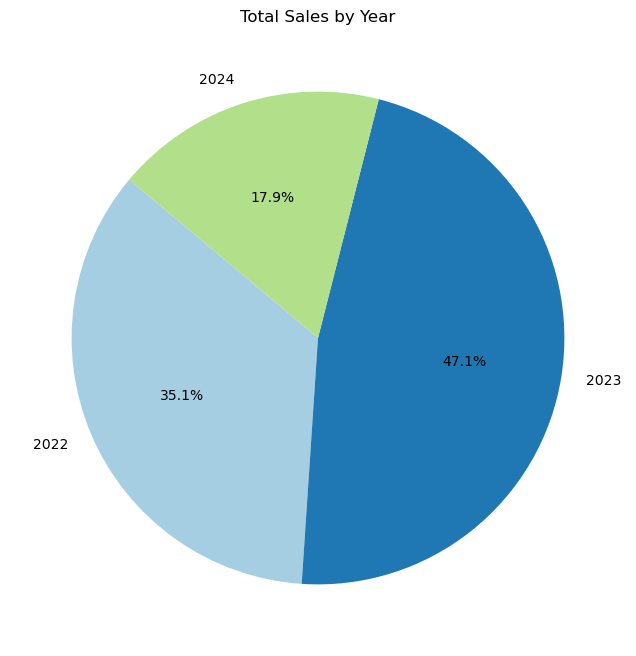

In [24]:
sales_by_year = main_data.groupby('YEAR_ID')['Sales'].sum()
#plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_year, labels=sales_by_year.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Total Sales by Year")
plt.show()

Created Date column with the format  'YYYY-MM-DD' 

In [25]:
# creating one date column
main_data['Date'] = pd.to_datetime(main_data[['YEAR_ID', 'MONTH_ID', 'DAY_ID']].astype(str).agg('-'.join,axis=1))
# droping the previous columns
main_data = main_data.drop(columns=['DAY_ID', 'MONTH_ID','YEAR_ID'])

In [26]:
# inspection
main_data.head()
#date format = YYY/MM/D

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,ProductCode,CustomerName,Phone,AddressLine1,City,PostalCode,Country,Territory,Branch,CostPrice,ContactName,Date
0,10100,49,34.47,1,1689.03,Shipped,1,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NA,Skates Road,22.4055,Valarie Young,2022-01-06
1,10100,50,67.80,2,3390.00,Shipped,1,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NA,Bergenville,44.0700,Valarie Young,2022-01-06
2,10100,30,100.00,3,5151.00,Shipped,1,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NA,Bergenville,65.0000,Valarie Young,2022-01-06
3,10100,22,86.51,4,1903.22,Shipped,1,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,NA,Skates Road,56.2315,Valarie Young,2022-01-06
4,10101,26,100.00,1,3773.38,Shipped,1,S18_2795,Blauer See Auto Co.,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,60528,Germany,EMEA,Bergenville,65.0000,Roland Keitel,2022-01-09


#### ***2.Data Dictionary***

In [27]:
# loading the data
data_dictionary = pd.read_excel(path, sheet_name='Data Dictionary')

In [28]:
# Displaying the first few rows
data_dictionary.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Field Name,Description,Data Type
0,NaN,NaN,NaN,OrderNumber,Unique identifier for each order,Integer
1,NaN,NaN,NaN,QuantityOrdered,Number of units ordered for a specific product,Integer
2,NaN,NaN,NaN,PriceEach,Price per unit of the product,Decimal
3,NaN,NaN,NaN,OrderLineNumber,Line number of the product in the order (to di...,Integer
4,NaN,NaN,NaN,Sales,Total sales amount for the order line,Decimal


Handling missing values

In [29]:
# checking the null values in percentage
data_dictionary.isnull().sum() / len(data_dictionary) * 100

Unnamed: 0     100.0
Unnamed: 1     100.0
Unnamed: 2     100.0
Field Name       0.0
Description      0.0
Data Type        0.0
dtype: float64

In [30]:
#columns in dictionary
data_dictionary.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Field Name', 'Description',
       'Data Type'],
      dtype='object')

In [31]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']
# Drop the columns
data_dictionary = data_dictionary.drop(columns=columns_to_drop)


In [32]:
# displaying first few rows in dictionary
data_dictionary.head()

,Field Name,Description,Data Type
0,OrderNumber,Unique identifier for each order,Integer
1,QuantityOrdered,Number of units ordered for a specific product,Integer
2,PriceEach,Price per unit of the product,Decimal
3,OrderLineNumber,Line number of the product in the order (to di...,Integer
4,Sales,Total sales amount for the order line,Decimal


#### ***3. Product Master***

In [33]:
# loading the data
Product_master= pd.read_excel(path, sheet_name='Product Master')


In [34]:
# display the first rows
Product_master.head()

,ProductLine,ProductCode,MSRP
0,Classic Cars,S10_1949,214
1,Classic Cars,S10_4757,136
2,Classic Cars,S10_4962,147
3,Classic Cars,S12_1099,194
4,Classic Cars,S12_1108,207


In [35]:
# checking the null values in percentage
Product_master.isnull().sum() / len(Product_master) * 100


ProductLine    0.0
ProductCode    0.0
MSRP           0.0
dtype: float64

# **Merging Datasets**

The datasets main_data and product_master have one common column **ProductCode** hence we will merge the two on the ProductCode column.
The data dictionary dataset explains the columns in the two datasets :(product_master and main_data)

In [36]:
# merging the datasets on product code
sales = pd.merge(main_data, Product_master, on='ProductCode', how='inner')
sales

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,ProductCode,CustomerName,Phone,...,City,PostalCode,Country,Territory,Branch,CostPrice,ContactName,Date,ProductLine,MSRP
0,10100,49,34.47,1,1689.03,Shipped,1,S24_3969,Online Diecast Creations Co.,6035558647,...,Nashua,62005,USA,NA,Skates Road,22.4055,Valarie Young,2022-01-06,Vintage Cars,41
1,10110,48,34.47,5,1654.56,Shipped,1,S24_3969,AV Stores Co.,(171) 555-1555,...,Manchester,EC2 5NT,UK,EMEA,Skates Road,22.4055,Victoria Ashworth,2022-03-18,Vintage Cars,41
2,10124,46,33.23,4,1528.58,Shipped,2,S24_3969,Signal Gift Stores,7025551838,...,Las Vegas,83030,USA,NA,Skates Road,21.5995,Sue King,2022-05-21,Vintage Cars,41
3,10149,26,38.98,9,1013.48,Shipped,3,S24_3969,Signal Collectibles Ltd.,4155554312,...,Brisbane,94217,USA,NA,Skates Road,25.3370,Sue Taylor,2022-09-12,Vintage Cars,41
4,10162,37,38.98,7,1442.26,Shipped,4,S24_3969,Corporate Gift Ideas Co.,6505551386,...,San Francisco,0,USA,NA,Skates Road,25.3370,Julie Brown,2022-10-18,Vintage Cars,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10343,36,100.00,4,5848.92,Shipped,4,S18_1589,Reims Collectables,26.47.1555,...,Reims,51100,France,EMEA,Bergenville,65.0000,Paul Henriot,2023-11-24,Classic Cars,124
2819,10367,49,56.30,1,2758.70,Resolved,1,S18_1589,Toys4GrownUps.com,6265557265,...,Pasadena,90003,USA,NA,Skates Road,36.5950,Julie Young,2024-01-12,Classic Cars,124
2820,10378,34,42.64,5,1449.76,Shipped,1,S18_1589,Euro Shopping Channel,(91) 555 94 44,...,Madrid,28034,Spain,EMEA,Skates Road,27.7160,Diego Freyre,2024-02-10,Classic Cars,124
2821,10407,59,100.00,11,7048.14,On Hold,2,S18_1589,The Sharp Gifts Warehouse,4085553659,...,San Jose,94217,USA,NA,Geiselweg,65.0000,Sue Frick,2024-04-22,Classic Cars,124


In [37]:
# checking the rows and columns
sales.shape

(2823, 21)

so far we have 2823 rows and 21 columns

In [38]:
#checking the columns
sales.columns

Index(['OrderNumber', 'QuantityOrdered', 'PriceEach', 'OrderLineNumber',
       'Sales', 'Status', 'QTR_ID', 'ProductCode', 'CustomerName', 'Phone',
       'AddressLine1', 'City', 'PostalCode', 'Country', 'Territory', 'Branch',
       'CostPrice', 'ContactName', 'Date', 'ProductLine', 'MSRP'],
      dtype='object')

In [39]:
#checking the whole data information
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderNumber      2823 non-null   int64         
 1   QuantityOrdered  2823 non-null   int64         
 2   PriceEach        2823 non-null   float64       
 3   OrderLineNumber  2823 non-null   int64         
 4   Sales            2823 non-null   float64       
 5   Status           2823 non-null   object        
 6   QTR_ID           2823 non-null   int64         
 7   ProductCode      2823 non-null   object        
 8   CustomerName     2823 non-null   object        
 9   Phone            2823 non-null   object        
 10  AddressLine1     2823 non-null   object        
 11  City             2823 non-null   object        
 12  PostalCode       2823 non-null   object        
 13  Country          2823 non-null   object        
 14  Territory        2823 non-null   object 

In [40]:
# checking the whole data description
sales.describe()

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,QTR_ID,CostPrice,Date,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,54.378054,2023-05-11 12:41:03.761955584,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,17.472000,2022-01-06 00:00:00,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,44.759000,2022-11-06 12:00:00,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,62.205000,2023-06-15 00:00:00,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,65.000000,2023-11-17 12:00:00,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,65.000000,2024-05-31 00:00:00,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,13.113280,NaN,40.187912


Handling Missing Values

In [41]:
# checking the null values
sales.isnull().sum()

OrderNumber        0
QuantityOrdered    0
PriceEach          0
OrderLineNumber    0
Sales              0
Status             0
QTR_ID             0
ProductCode        0
CustomerName       0
Phone              0
AddressLine1       0
City               0
PostalCode         0
Country            0
Territory          0
Branch             0
CostPrice          0
ContactName        0
Date               0
ProductLine        0
MSRP               0
dtype: int64

## **Data Pre-Processing (merged data)**

Adding calculated columns for more business insights

In [42]:
# checking for numeric columns
numeric_cols = sales.select_dtypes(include=[float, int])
numeric_cols

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,QTR_ID,CostPrice,MSRP
0,10100,49,34.47,1,1689.03,1,22.4055,41
1,10110,48,34.47,5,1654.56,1,22.4055,41
2,10124,46,33.23,4,1528.58,2,21.5995,41
3,10149,26,38.98,9,1013.48,3,25.3370,41
4,10162,37,38.98,7,1442.26,4,25.3370,41
...,...,...,...,...,...,...,...,...
2818,10343,36,100.00,4,5848.92,4,65.0000,124
2819,10367,49,56.30,1,2758.70,1,36.5950,124
2820,10378,34,42.64,5,1449.76,1,27.7160,124
2821,10407,59,100.00,11,7048.14,2,65.0000,124


**TotalCosts** is the value of QuantityOrdered by the CostPrice

In [43]:
# calculating TotalCosts
sales['TotalCosts'] = sales['QuantityOrdered'] * sales['CostPrice']

The totalcost column represents the revenue generated from purchasing a specific quantity of a product before you sell it to customers

**TotalSalesAmount** is the value of QuantityOrdered by the Price of each product (PriceEach)

In [44]:
# calculating the TotalSalesAmount
sales['TotalSalesAmount'] = sales['QuantityOrdered'] * sales['PriceEach']

The TotalSalesAmount column represents the revenue generated from selling a specific quantity of a product at a given price

**Profit** is the difference between TotalSales and TotalCosts

In [45]:
# calculating the profit
sales['Profit'] = sales['TotalSalesAmount'] - sales['TotalCosts']

With both TotalSalesAmount and TotalCosts we can get the profit by calculating the difference between the columns

**ProfitMargin** is the percentage of Profits by TotalCosts

In [46]:
# calculating profit margin
sales['ProfitMargin'] = (sales['Profit']/sales['TotalCosts'])*100

The profit margin is the % of the profit . we divide  profit by total costs and then we multipy by 100

In [47]:
# calculating TotalDiscounted
sales['TotalDiscounted'] = (sales['MSRP']*sales['QuantityOrdered']) - sales['TotalSalesAmount']

In [48]:
#columns inspections
sales.columns

Index(['OrderNumber', 'QuantityOrdered', 'PriceEach', 'OrderLineNumber',
       'Sales', 'Status', 'QTR_ID', 'ProductCode', 'CustomerName', 'Phone',
       'AddressLine1', 'City', 'PostalCode', 'Country', 'Territory', 'Branch',
       'CostPrice', 'ContactName', 'Date', 'ProductLine', 'MSRP', 'TotalCosts',
       'TotalSalesAmount', 'Profit', 'ProfitMargin', 'TotalDiscounted'],
      dtype='object')

## ***EXPLORATORY DATA ANALYSIS  (EDA)***

##### Toy types with their total sales amounts performace

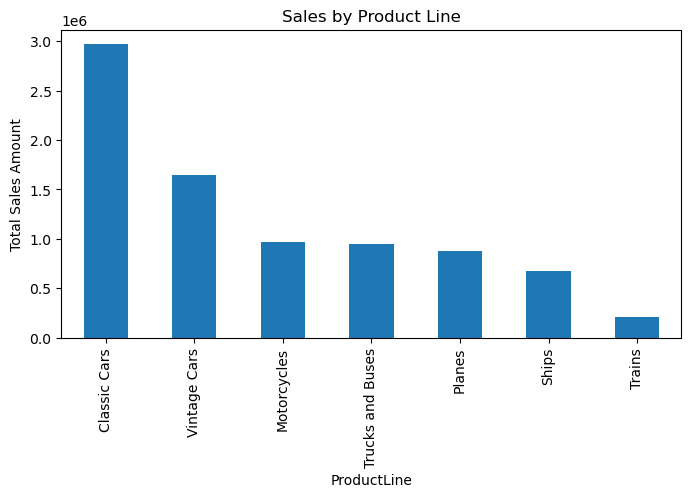

In [49]:
# Sales by Product Line
product_sales = sales.groupby('ProductLine')['TotalSalesAmount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
product_sales.plot(kind='bar', title='Sales by Product Line')
plt.ylabel('Total Sales Amount')
plt.show()

Classic Cars have the most sales

##### Consumption of the products by each country

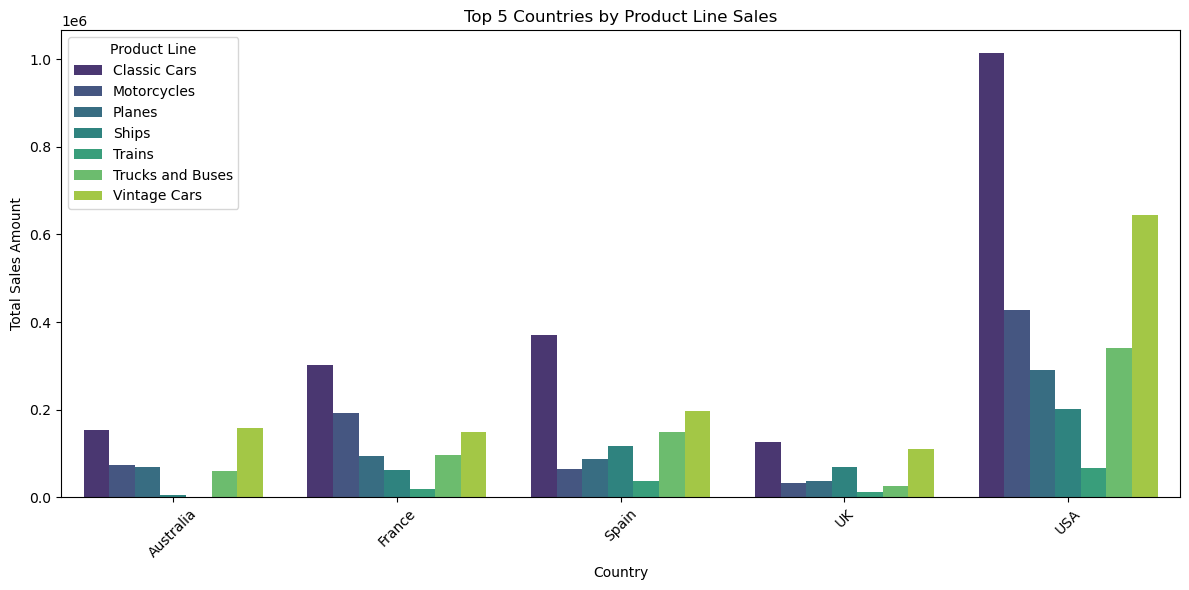

In [50]:
country_product_sales = sales.groupby(['Country', 'ProductLine'])['TotalSalesAmount'].sum().reset_index()
country_sales_total = country_product_sales.groupby('Country')['TotalSalesAmount'].sum()
top_countries = country_sales_total.nlargest(5).index
top_data = country_product_sales[country_product_sales['Country'].isin(top_countries)]

#plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_data, x='Country', y='TotalSalesAmount', hue='ProductLine', palette='viridis')
plt.title("Top 5 Countries by Product Line Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.legend(title='Product Line')
plt.tight_layout()
plt.show()

In [51]:
territory_product_sales = sales.groupby(['Territory', 'ProductLine']).size().reset_index(name='SalesCount')
top_products_by_territory = territory_product_sales.loc[territory_product_sales.groupby('Territory')['SalesCount'].idxmax()]
top_products_by_territory


,Territory,ProductLine,SalesCount
0,APAC,Classic Cars,68
7,EMEA,Classic Cars,518
14,Japan,Classic Cars,38
21,NA,Classic Cars,343


##### Displaying how the products performed across the different territories

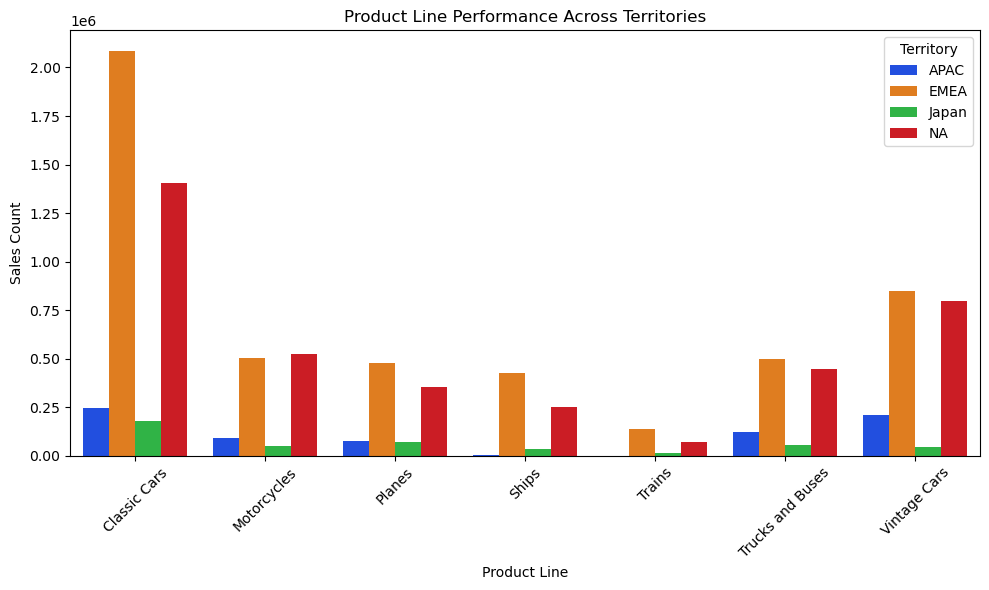

In [52]:
territory_productline_sales = sales.groupby(['Territory', 'ProductLine'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=territory_productline_sales, x='ProductLine', y='Sales', hue='Territory', palette='bright')
plt.title("Product Line Performance Across Territories")
plt.xlabel("Product Line")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.legend(title='Territory')
plt.tight_layout()
plt.show()

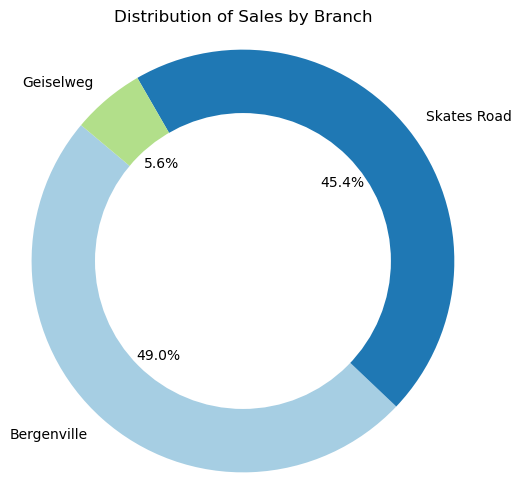

In [53]:
#value counts of the 'Branch' column
branch_counts = sales['Branch'].value_counts()
#Plotting using a  donut chart
plt.figure(figsize=(6, 6))
plt.pie(branch_counts, labels=branch_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.title("Distribution of Sales by Branch")
plt.axis('equal')  
plt.show()


Beergenville branch had the most sales(49.0%),Geiselweg had the least sales of(5.6%)

##### ContactName and the sum of sales

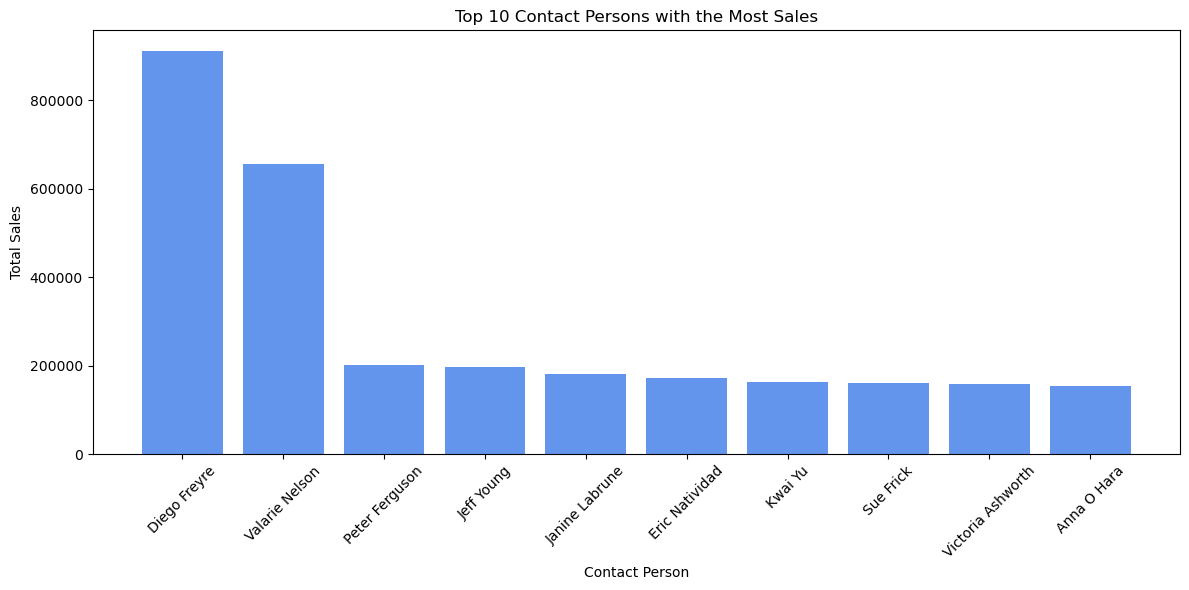

In [54]:
contact_sales = sales.groupby('ContactName')['Sales'].sum().reset_index()
top_contacts = contact_sales.sort_values(by='Sales', ascending=False).head(10)
#plotting the top 10 contact persons
plt.figure(figsize=(12, 6))
plt.bar(top_contacts['ContactName'], top_contacts['Sales'], color='cornflowerblue')
plt.title("Top 10 Contact Persons with the Most Sales")
plt.xlabel("Contact Person")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### CustomerName by the sum of sales

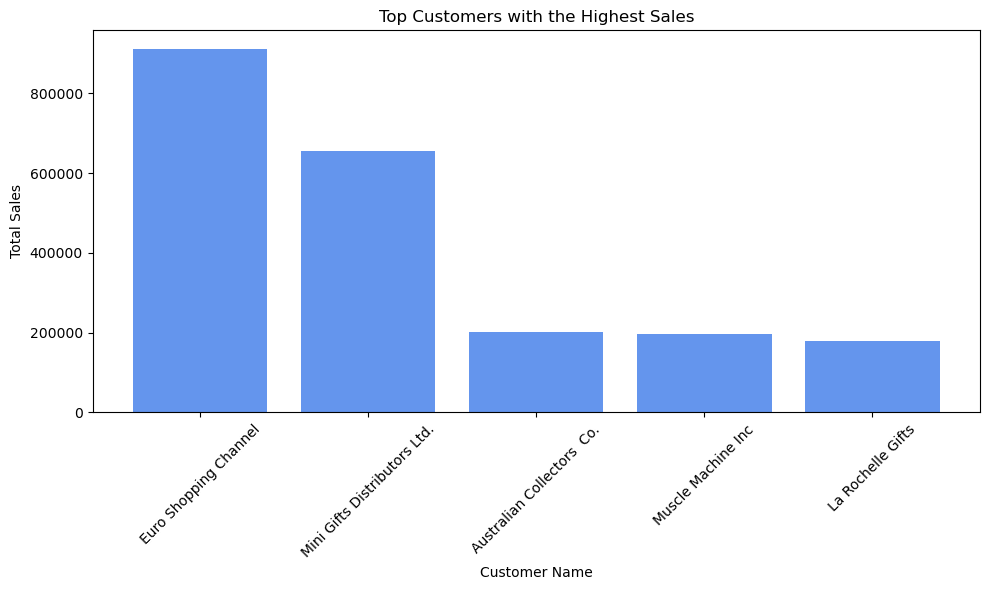

In [55]:
customer_sales = sales.groupby('CustomerName')['Sales'].sum().reset_index()
top_customers = customer_sales.sort_values(by='Sales', ascending=False).head()
#plotting the top 5 customers
plt.figure(figsize=(10, 6))
plt.bar(top_customers['CustomerName'], top_customers['Sales'], color='cornflowerblue')
plt.title("Top Customers with the Highest Sales")
plt.xlabel("Customer Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### CustomerName by sum of quantity ordered

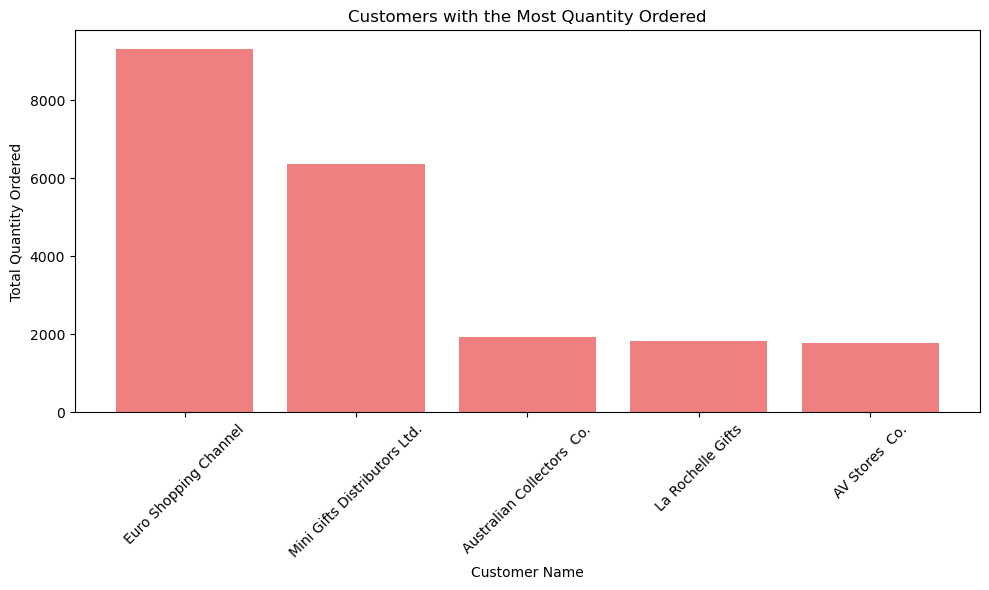

In [56]:
customer_quantity = sales.groupby('CustomerName')['QuantityOrdered'].sum().reset_index()
top_customers_quantity = customer_quantity.sort_values(by='QuantityOrdered', ascending=False).head(5)
#plotting the top 10 customers by quantity ordered
plt.figure(figsize=(10, 6))
plt.bar(top_customers_quantity['CustomerName'], top_customers_quantity['QuantityOrdered'], color='lightcoral')
plt.title("Customers with the Most Quantity Ordered")
plt.xlabel("Customer Name")
plt.ylabel("Total Quantity Ordered")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Quarterly trends 

Text(0, 0.5, 'Total Sales Amount')

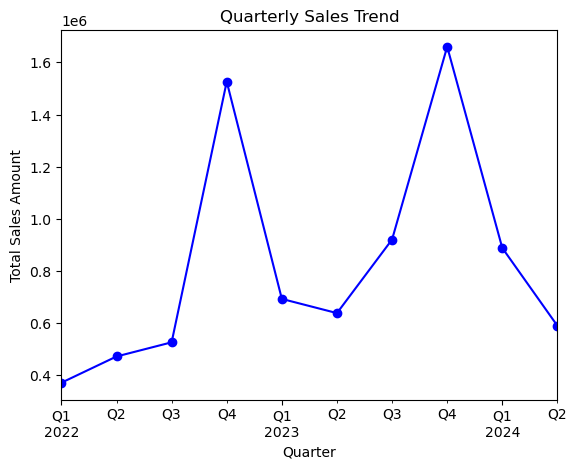

In [59]:
plt.subplot(1, 1, 1)
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Quarter'] = sales['Date'].dt.to_period("Q")
quarterly_sales = sales.groupby('Quarter')['TotalSalesAmount'].sum()
quarterly_sales.plot(kind='line', marker='o', color='b')
plt.title("Quarterly Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Total Sales Amount")

##### Sales Count by Status

Text(0, 0.5, 'Count')

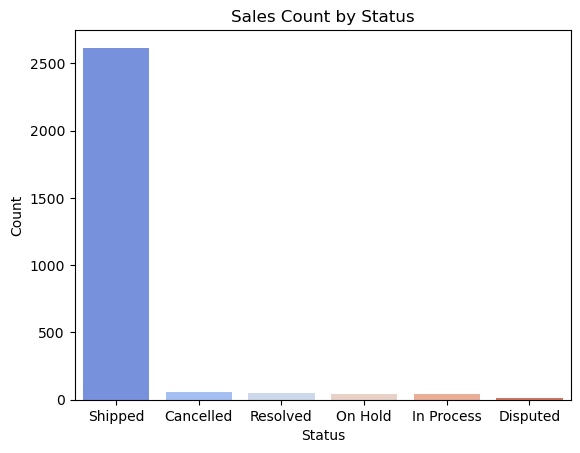

In [61]:
plt.subplot(1, 1, 1)
status_counts = sales['Status'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values, palette='coolwarm')
plt.title("Sales Count by Status")
plt.xlabel("Status")
plt.ylabel("Count")

##### Profit by ProductLine

Text(0, 0.5, 'Product Line')

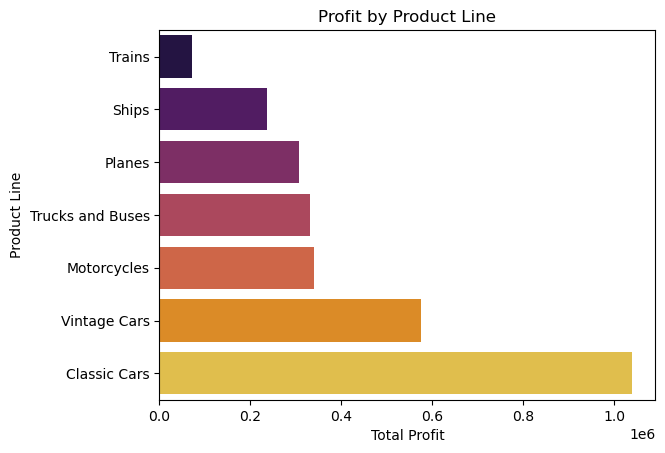

In [66]:
plt.subplot(1, 1, 1)
product_profit = sales.groupby('ProductLine')['Profit'].sum().sort_values()
sns.barplot(x=product_profit.values, y=product_profit.index, palette='inferno')
plt.title("Profit by Product Line")
plt.xlabel("Total Profit")
plt.ylabel("Product Line")

##### Total Discount by Product Line

Text(0, 0.5, 'Product Line')

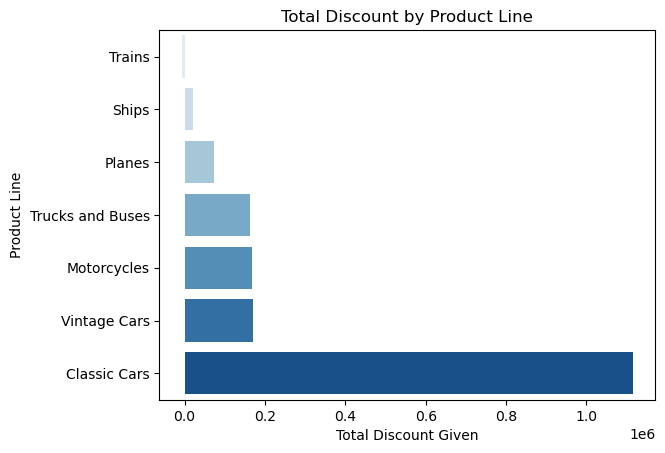

In [70]:
plt.subplot(1, 1, 1)
product_discount = sales.groupby('ProductLine')['TotalDiscounted'].sum().sort_values()
sns.barplot(x=product_discount.values, y=product_discount.index, palette='Blues')
plt.title("Total Discount by Product Line")
plt.xlabel("Total Discount Given")
plt.ylabel("Product Line")